In [1]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import re

import config_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_syntheic_load(true_values: any, predicted_values: any, test_data_path: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')
    filename = test_data_path.split('/')[-1].split('.')[0]

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.title(f'Syntheic Data Prediction ({filename})')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [4]:
def plot_syntheic_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [5]:
def plot_syntheic_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [6]:
def plot_syntheic_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [7]:
def plot_syntheic_load_list_by_mean_std_with_labels(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [8]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [9]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [10]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [11]:
def plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list: any, labels: List[str], sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

## Case1

In [12]:
case1_df = load_csv_data(config.case1_predict_results_path)
case1_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,NaN
1,2,0.531445,NaN,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,NaN
2,3,0.562767,NaN,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,NaN
3,4,0.593841,NaN,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,NaN
4,5,0.624545,NaN,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,NaN


In [13]:
case1_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.001866,0.008096,0.001866,0.001866,0.001866,0.003115,0.004357,0.003115,0.006848,0.003115,NaN
39997,19997,NaN,NaN,0.002679,0.007660,0.007660,0.002679,0.005169,0.002302,0.005169,0.002302,0.002679,0.007284,NaN
39998,19998,NaN,NaN,0.001120,0.006101,0.001120,0.001371,0.006101,0.006101,0.006101,0.006101,0.006101,0.006101,NaN
39999,19999,NaN,NaN,0.004669,0.004669,0.004669,0.002803,0.004669,0.000313,0.004669,0.004669,0.000313,0.002803,NaN
40000,20000,NaN,NaN,0.006856,0.003106,0.008087,0.006856,0.003106,0.001875,0.003106,0.001875,0.001875,0.004366,NaN


In [14]:
# true values need to be shifted by 1
true_values = case1_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531445
2        0.562767
3        0.593841
4        0.624545
5        0.654758
           ...   
19997    1.406160
19998    1.437230
19999    1.468550
20000    1.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [15]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case1_predicted_values = case1_df[predicted_column][config.start:config.end+1]
case1_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875
1,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763
2,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650
3,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538
4,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406
...,...,...,...,...,...,...,...,...,...,...
19996,1.403480,1.398500,1.398500,1.403480,1.400990,1.408460,1.400990,1.408460,1.403480,1.413440
19997,1.438350,1.443330,1.438350,1.435860,1.443330,1.443330,1.443330,1.443330,1.443330,1.443330
19998,1.473220,1.473220,1.473220,1.465750,1.473220,1.468240,1.473220,1.473220,1.468240,1.465750
19999,1.493140,1.503110,1.508090,1.493140,1.503110,1.498120,1.503110,1.498120,1.498120,1.495630


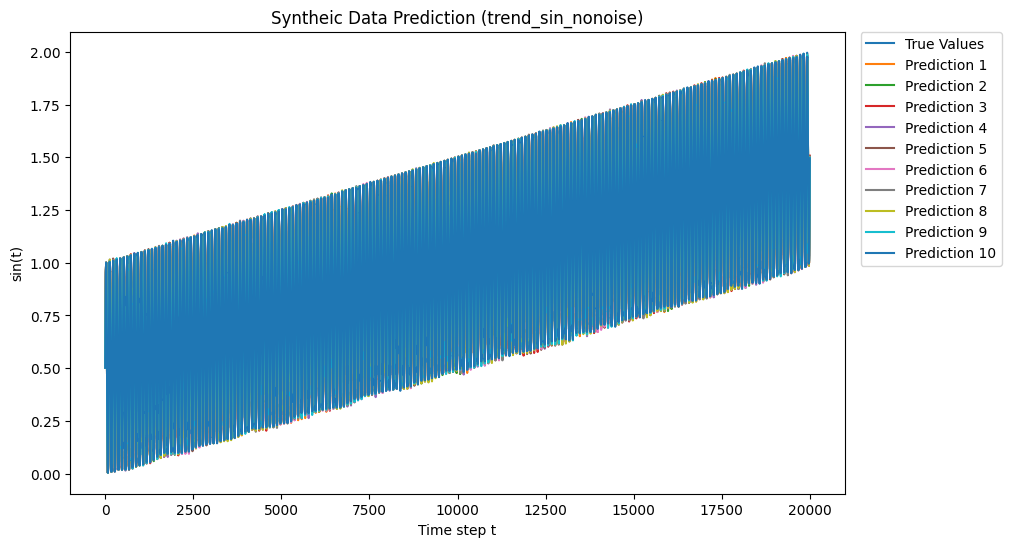

In [16]:
plot_syntheic_load(true_values, case1_predicted_values, config.test_data_path)

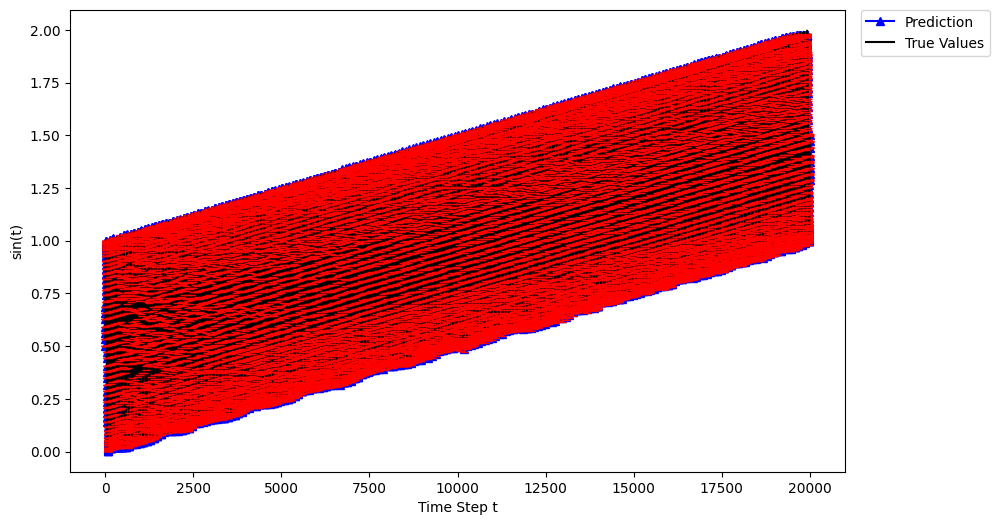

In [17]:
plot_syntheic_load_by_mean_std(true_values, case1_predicted_values, sampling_interval=config.sampling_interval)

In [18]:
# abs(outputdata[n][a] - inputdata[a+1])
case1_error_abs_value = case1_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case1_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,0.029570,0.029570,0.029570,0.029570,0.029570,0.029570,0.029570,0.029570,0.029570,0.029570
20002,0.031005,0.031005,0.031005,0.031005,0.031005,0.031005,0.031005,0.031005,0.031005,0.031005
20003,0.032191,0.032191,0.032191,0.032191,0.032191,0.032191,0.032191,0.032191,0.032191,0.032191
20004,0.033008,0.033008,0.033008,0.033008,0.033008,0.033008,0.033008,0.033008,0.033008,0.033008
...,...,...,...,...,...,...,...,...,...,...
39996,0.001866,0.008096,0.001866,0.001866,0.001866,0.003115,0.004357,0.003115,0.006848,0.003115
39997,0.002679,0.007660,0.007660,0.002679,0.005169,0.002302,0.005169,0.002302,0.002679,0.007284
39998,0.001120,0.006101,0.001120,0.001371,0.006101,0.006101,0.006101,0.006101,0.006101,0.006101
39999,0.004669,0.004669,0.004669,0.002803,0.004669,0.000313,0.004669,0.004669,0.000313,0.002803


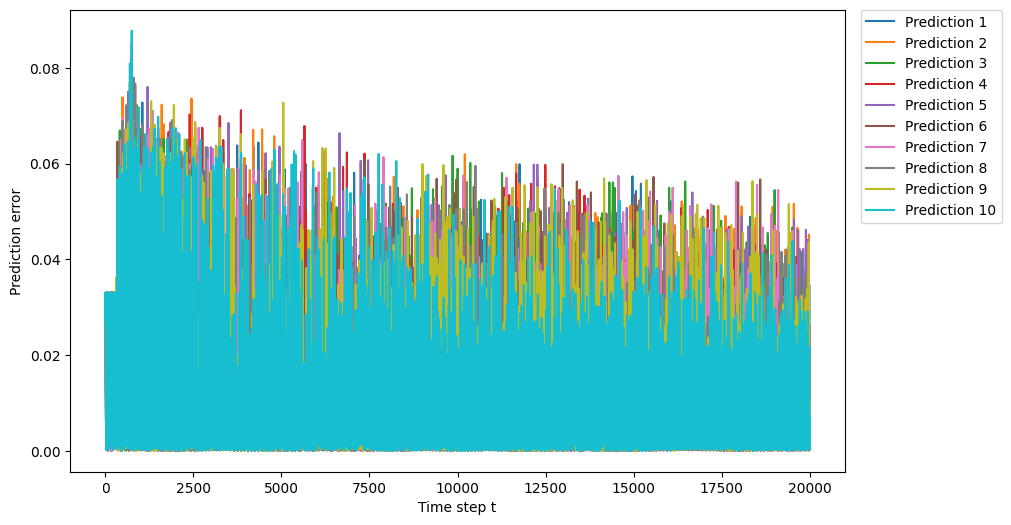

In [19]:
plot_prediction_absolute_error(case1_error_abs_value)

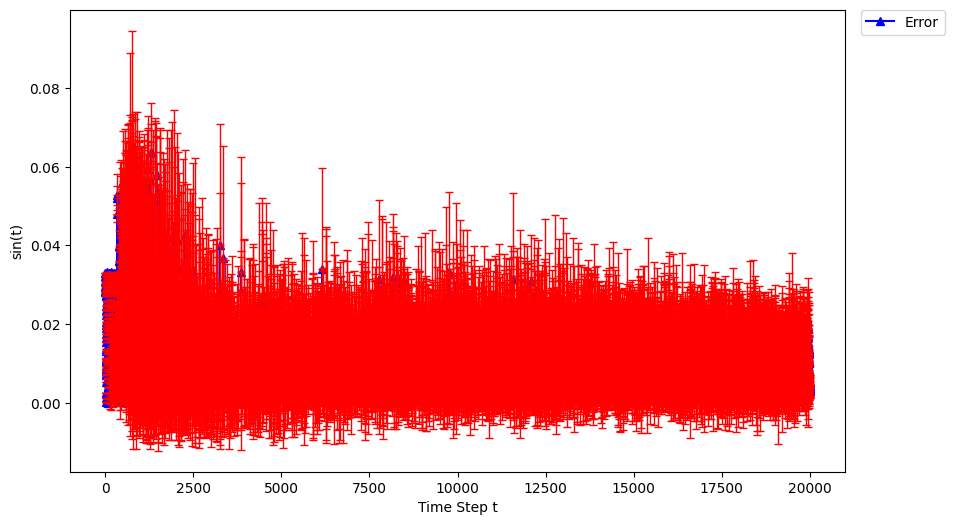

In [20]:
plot_prediction_absolute_error_by_mean_std(case1_error_abs_value, sampling_interval=config.sampling_interval)

## Case2

In [21]:
case2_df = load_csv_data(config.case2_predict_results_path)
case2_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,NaN
1,2,0.531445,NaN,0.525,0.525,0.525,0.525,0.525,0.525,0.525,0.525,0.525,0.525,NaN
2,3,0.562767,NaN,0.575,0.575,0.575,0.575,0.575,0.575,0.575,0.575,0.575,0.575,NaN
3,4,0.593841,NaN,0.600,0.600,0.600,0.600,0.600,0.600,0.600,0.600,0.600,0.600,NaN
4,5,0.624545,NaN,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,NaN


In [22]:
case2_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,2.454000e-02,2.454000e-02,4.600000e-04,0.02546,2.454000e-02,2.546000e-02,0.04954,3.704000e-02,2.454000e-02,0.02454,NaN
39997,19997,NaN,NaN,4.384000e-02,1.884000e-02,3.116000e-02,0.03116,6.160000e-03,1.884000e-02,0.03134,4.384000e-02,1.884000e-02,0.01884,NaN
39998,19998,NaN,NaN,3.777000e-02,3.777000e-02,1.223000e-02,0.03723,1.223000e-02,1.277000e-02,0.01277,3.777000e-02,1.277000e-02,0.01277,NaN
39999,19999,NaN,NaN,3.145000e-02,1.895000e-02,4.355000e-02,0.06855,6.450000e-03,6.450000e-03,0.03145,3.145000e-02,6.450000e-03,0.00645,NaN
40000,20000,NaN,NaN,2.220450e-16,2.220450e-16,2.220450e-16,0.02500,2.220450e-16,2.220450e-16,0.02500,2.220450e-16,2.220450e-16,0.01250,NaN


In [23]:
# true values need to be shifted by 1
true_values = case2_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531445
2        0.562767
3        0.593841
4        0.624545
5        0.654758
           ...   
19997    1.406160
19998    1.437230
19999    1.468550
20000    1.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [24]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case2_predicted_values = case2_df[predicted_column][config.start:config.end+1]
case2_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.500,0.5000,0.500,0.500,0.500,0.500,0.5000,0.500,0.500,0.5000
1,0.525,0.5250,0.525,0.525,0.525,0.525,0.5250,0.525,0.525,0.5250
2,0.575,0.5750,0.575,0.575,0.575,0.575,0.5750,0.575,0.575,0.5750
3,0.600,0.6000,0.600,0.600,0.600,0.600,0.6000,0.600,0.600,0.6000
4,0.625,0.6250,0.625,0.625,0.625,0.625,0.6250,0.625,0.625,0.6250
...,...,...,...,...,...,...,...,...,...,...
19996,1.450,1.4250,1.375,1.375,1.400,1.425,1.4375,1.450,1.425,1.4250
19997,1.475,1.4750,1.425,1.400,1.425,1.450,1.4500,1.475,1.450,1.4500
19998,1.500,1.4875,1.425,1.400,1.475,1.475,1.5000,1.500,1.475,1.4750
19999,1.500,1.5000,1.500,1.475,1.500,1.500,1.5250,1.500,1.500,1.5125


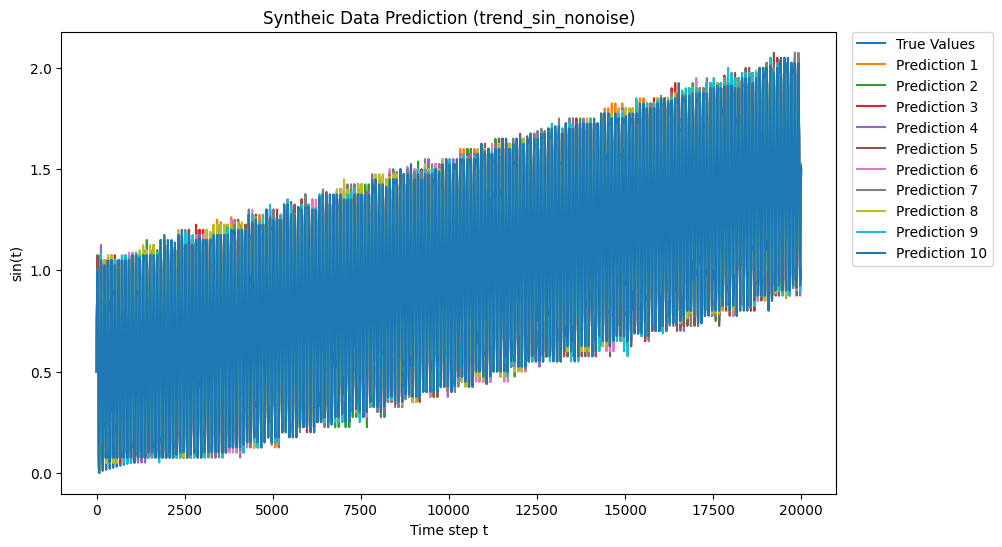

In [25]:
plot_syntheic_load(true_values, case2_predicted_values, config.test_data_path)

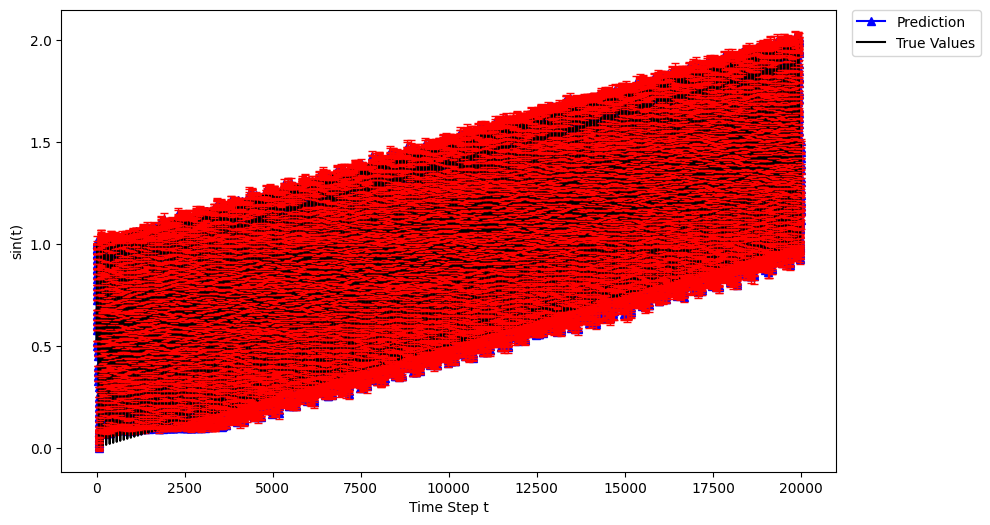

In [26]:
plot_syntheic_load_by_mean_std(true_values, case2_predicted_values, sampling_interval=config.sampling_interval)

In [27]:
# abs(outputdata[n][a] - inputdata[a+1])
case2_error_abs_value = case2_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case2_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,3.144500e-02,3.144500e-02,3.144500e-02,0.031445,3.144500e-02,3.144500e-02,0.031445,3.144500e-02,3.144500e-02,0.031445
20002,3.776700e-02,3.776700e-02,3.776700e-02,0.037767,3.776700e-02,3.776700e-02,0.037767,3.776700e-02,3.776700e-02,0.037767
20003,1.884100e-02,1.884100e-02,1.884100e-02,0.018841,1.884100e-02,1.884100e-02,0.018841,1.884100e-02,1.884100e-02,0.018841
20004,2.454500e-02,2.454500e-02,2.454500e-02,0.024545,2.454500e-02,2.454500e-02,0.024545,2.454500e-02,2.454500e-02,0.024545
...,...,...,...,...,...,...,...,...,...,...
39996,2.454000e-02,2.454000e-02,4.600000e-04,0.025460,2.454000e-02,2.546000e-02,0.049540,3.704000e-02,2.454000e-02,0.024540
39997,4.384000e-02,1.884000e-02,3.116000e-02,0.031160,6.160000e-03,1.884000e-02,0.031340,4.384000e-02,1.884000e-02,0.018840
39998,3.777000e-02,3.777000e-02,1.223000e-02,0.037230,1.223000e-02,1.277000e-02,0.012770,3.777000e-02,1.277000e-02,0.012770
39999,3.145000e-02,1.895000e-02,4.355000e-02,0.068550,6.450000e-03,6.450000e-03,0.031450,3.145000e-02,6.450000e-03,0.006450


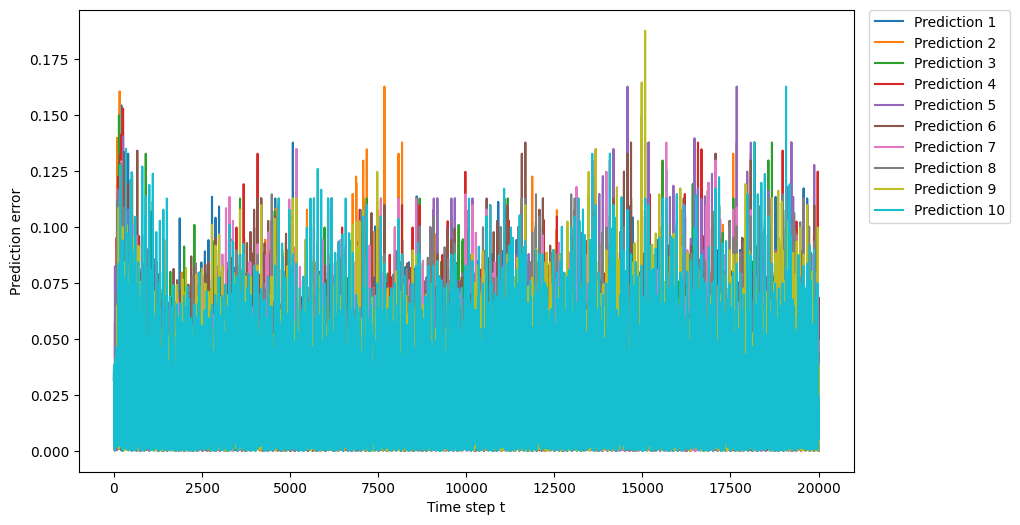

In [28]:
plot_prediction_absolute_error(case2_error_abs_value)

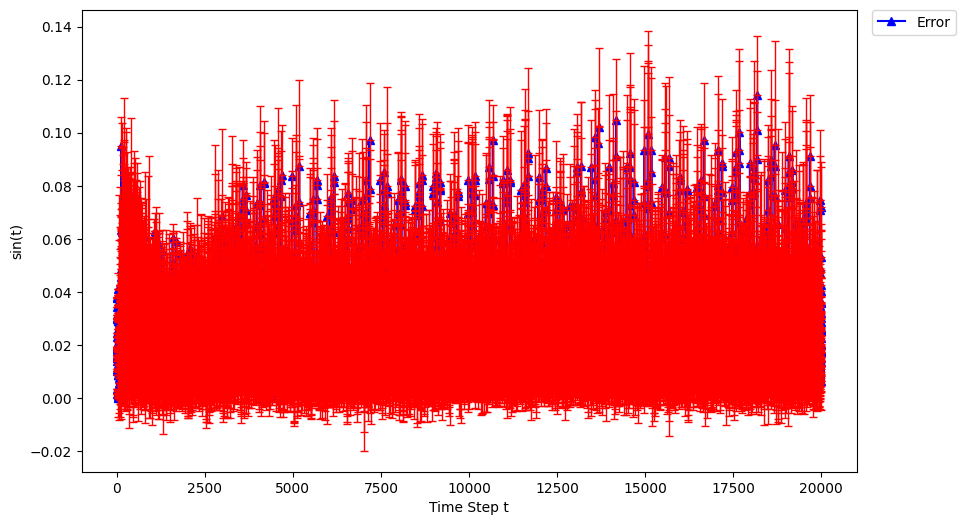

In [29]:
plot_prediction_absolute_error_by_mean_std(case2_error_abs_value, sampling_interval=config.sampling_interval)

## Case 3

In [30]:
case3_df = load_csv_data(config.case3_predict_results_path)
case3_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531445,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562767,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593841,NaN,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,NaN
4,5,0.624545,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [31]:
case3_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.38296,0.38921,0.38796,0.38546,0.38796,0.38546,0.38546,0.38546,0.38546,0.38796,NaN
39997,19997,NaN,NaN,0.41491,0.41616,0.41616,0.41616,0.41616,0.41616,0.41616,0.41616,0.41366,0.41616,NaN
39998,19998,NaN,NaN,0.44723,0.44973,0.44973,0.45598,0.44973,0.44973,0.44973,0.44723,0.45223,0.44973,NaN
39999,19999,NaN,NaN,0.48105,0.48105,0.48105,0.47855,0.48105,0.48105,0.48105,0.47855,0.48105,0.48105,NaN
40000,20000,NaN,NaN,0.51250,0.51000,0.51250,0.51250,0.51250,0.51250,0.51125,0.51000,0.51000,0.51250,NaN


In [32]:
# true values need to be shifted by 1
true_values = case3_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531445
2        0.562767
3        0.593841
4        0.624545
5        0.654758
           ...   
19997    1.406160
19998    1.437230
19999    1.468550
20000    1.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [33]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case3_predicted_values = case3_df[predicted_column][config.start:config.end+1]
case3_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.50000,0.5000,0.5000,0.50000,0.5000,0.5000,0.50000,0.5000,0.5000,0.5000
1,0.53250,0.5325,0.5325,0.53250,0.5325,0.5325,0.53250,0.5325,0.5325,0.5325
2,0.56250,0.5625,0.5625,0.56250,0.5625,0.5625,0.56250,0.5625,0.5625,0.5625
3,0.59500,0.5950,0.5950,0.59500,0.5950,0.5950,0.59500,0.5950,0.5950,0.5950
4,0.62500,0.6250,0.6250,0.62500,0.6250,0.6250,0.62500,0.6250,0.6250,0.6250
...,...,...,...,...,...,...,...,...,...,...
19996,0.99125,0.9900,0.9900,0.99000,0.9900,0.9900,0.99000,0.9900,0.9925,0.9900
19997,0.99000,0.9875,0.9875,0.98125,0.9875,0.9875,0.98750,0.9900,0.9850,0.9875
19998,0.98750,0.9875,0.9875,0.99000,0.9875,0.9875,0.98750,0.9900,0.9875,0.9875
19999,0.98750,0.9900,0.9875,0.98750,0.9875,0.9875,0.98875,0.9900,0.9900,0.9875


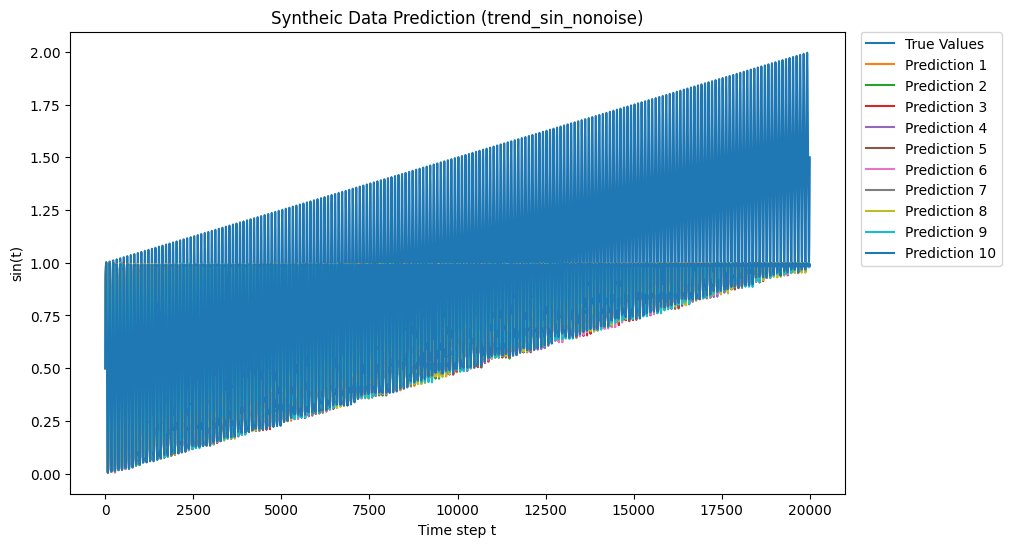

In [34]:
plot_syntheic_load(true_values, case3_predicted_values, config.test_data_path)

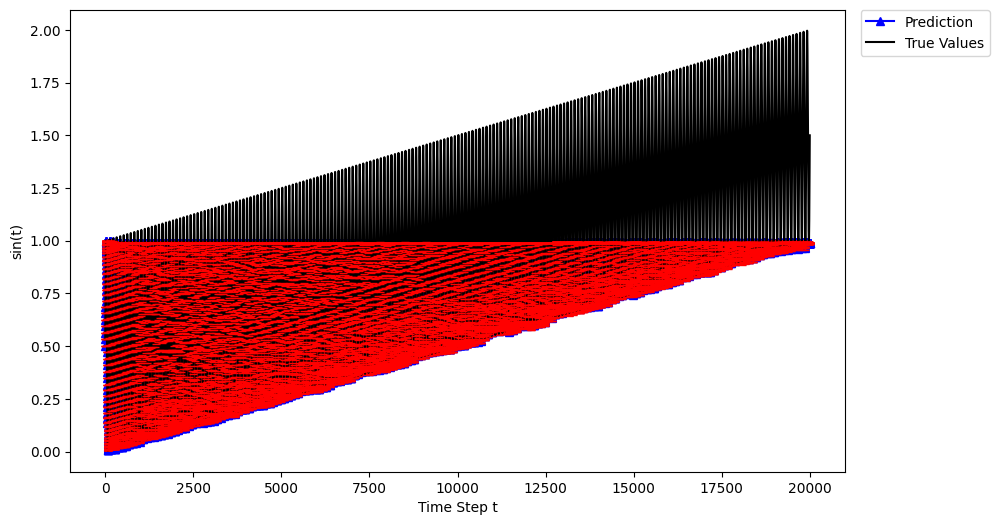

In [35]:
plot_syntheic_load_by_mean_std(true_values, case3_predicted_values, sampling_interval=config.sampling_interval)

In [36]:
# abs(outputdata[n][a] - inputdata[a+1])
case3_error_abs_value = case3_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case3_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,0.031445,0.031445,0.031445,0.031445,0.031445,0.031445,0.031445,0.031445,0.031445,0.031445
20002,0.030267,0.030267,0.030267,0.030267,0.030267,0.030267,0.030267,0.030267,0.030267,0.030267
20003,0.031341,0.031341,0.031341,0.031341,0.031341,0.031341,0.031341,0.031341,0.031341,0.031341
20004,0.029545,0.029545,0.029545,0.029545,0.029545,0.029545,0.029545,0.029545,0.029545,0.029545
...,...,...,...,...,...,...,...,...,...,...
39996,0.382960,0.389210,0.387960,0.385460,0.387960,0.385460,0.385460,0.385460,0.385460,0.387960
39997,0.414910,0.416160,0.416160,0.416160,0.416160,0.416160,0.416160,0.416160,0.413660,0.416160
39998,0.447230,0.449730,0.449730,0.455980,0.449730,0.449730,0.449730,0.447230,0.452230,0.449730
39999,0.481050,0.481050,0.481050,0.478550,0.481050,0.481050,0.481050,0.478550,0.481050,0.481050


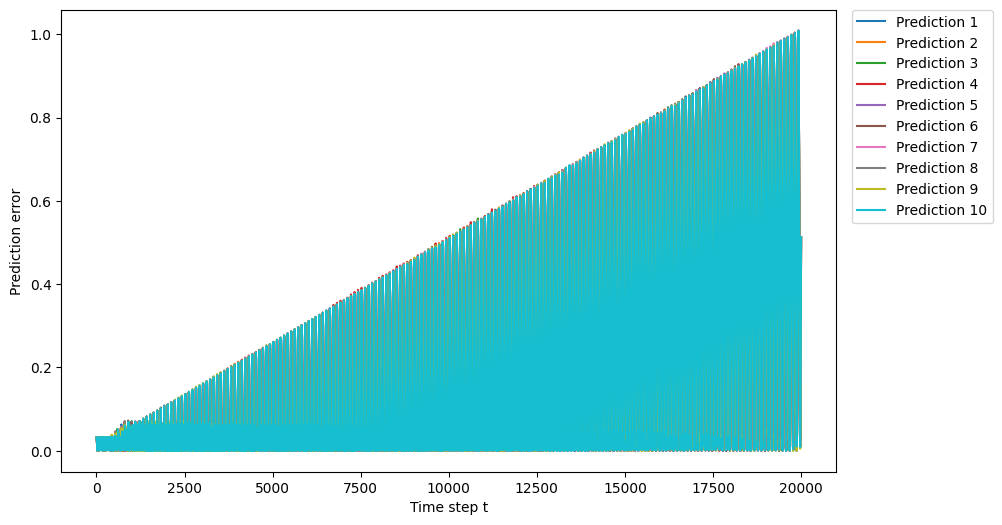

In [37]:
plot_prediction_absolute_error(case3_error_abs_value)

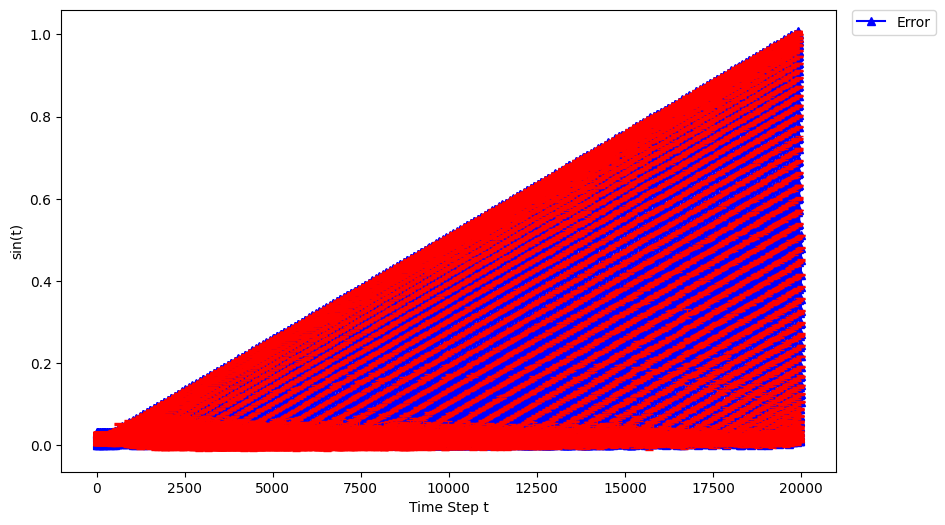

In [38]:
plot_prediction_absolute_error_by_mean_std(case3_error_abs_value, sampling_interval=config.sampling_interval)

## proposed(case4)

In [39]:
case4_df = load_csv_data(config.case4_predict_results_path)
case4_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531445,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562767,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593841,NaN,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,NaN
4,5,0.624545,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [40]:
# true values need to be shifted by 1
true_values = case4_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531445
2        0.562767
3        0.593841
4        0.624545
5        0.654758
           ...   
19997    1.406160
19998    1.437230
19999    1.468550
20000    1.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [41]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case4_predicted_values = case4_df[predicted_column][config.start:config.end+1]
case4_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.5000,0.50000,0.5000,0.5000,0.50000,0.50000,0.5000,0.5000,0.5000,0.50000
1,0.5325,0.53250,0.5325,0.5325,0.53250,0.53250,0.5325,0.5325,0.5325,0.53250
2,0.5625,0.56250,0.5625,0.5625,0.56250,0.56250,0.5625,0.5625,0.5625,0.56250
3,0.5950,0.59500,0.5950,0.5950,0.59500,0.59500,0.5950,0.5950,0.5950,0.59500
4,0.6250,0.62500,0.6250,0.6250,0.62500,0.62500,0.6250,0.6250,0.6250,0.62500
...,...,...,...,...,...,...,...,...,...,...
19996,1.4050,1.40750,1.4075,1.4050,1.40750,1.40625,1.4075,1.4075,1.4050,1.40125
19997,1.4375,1.43500,1.4350,1.4325,1.43500,1.43375,1.4375,1.4375,1.4350,1.43500
19998,1.4675,1.46875,1.4675,1.4675,1.46750,1.46750,1.4725,1.4700,1.4650,1.47000
19999,1.5000,1.50000,1.4925,1.4975,1.49875,1.49750,1.5050,1.5000,1.4950,1.50250


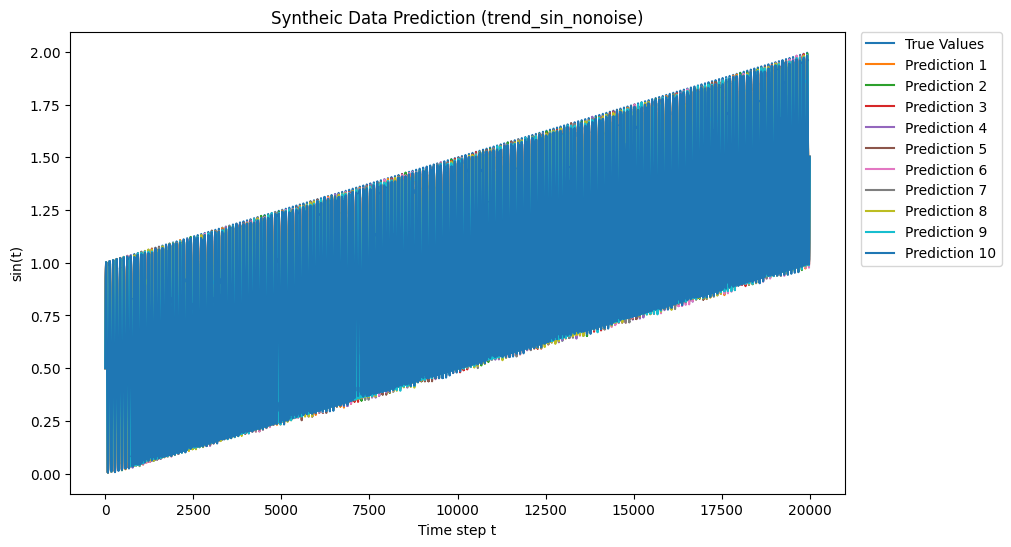

In [42]:
plot_syntheic_load(true_values, case4_predicted_values, config.test_data_path)

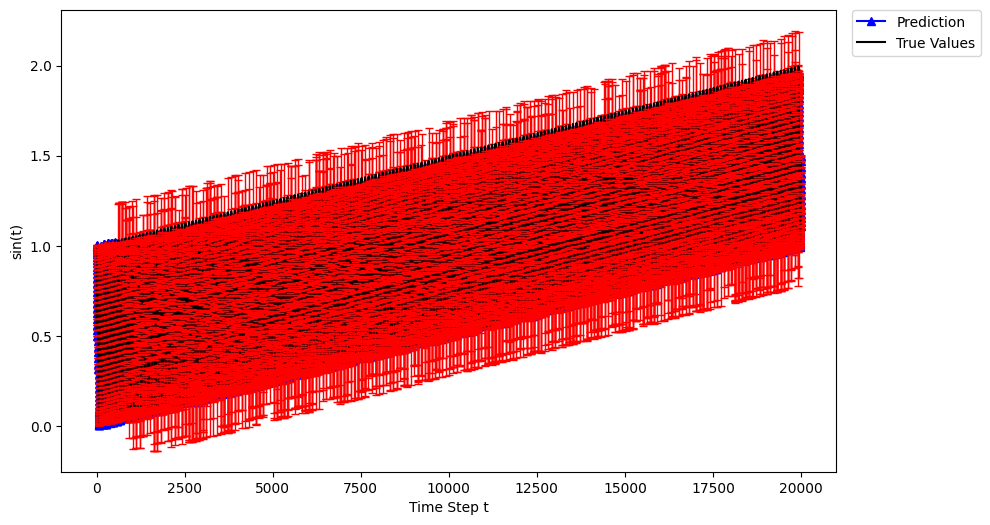

In [43]:
plot_syntheic_load_by_mean_std(true_values, case4_predicted_values, sampling_interval=config.sampling_interval)

In [44]:
# abs(outputdata[n][a] - inputdata[a+1])
case4_error_abs_value = case4_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case4_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,3.144500e-02,3.144500e-02,0.031445,0.031445,0.031445,0.031445,0.031445,3.144500e-02,0.031445,0.031445
20002,3.026700e-02,3.026700e-02,0.030267,0.030267,0.030267,0.030267,0.030267,3.026700e-02,0.030267,0.030267
20003,3.134100e-02,3.134100e-02,0.031341,0.031341,0.031341,0.031341,0.031341,3.134100e-02,0.031341,0.031341
20004,2.954500e-02,2.954500e-02,0.029545,0.029545,0.029545,0.029545,0.029545,2.954500e-02,0.029545,0.029545
...,...,...,...,...,...,...,...,...,...,...
39996,4.600000e-04,4.600000e-04,0.002040,0.000460,0.004540,0.002040,0.002040,2.040000e-03,0.000460,0.004540
39997,1.160000e-03,1.340000e-03,0.001340,0.001160,0.001340,0.000090,0.001340,1.340000e-03,0.001160,0.004910
39998,2.700000e-04,2.230000e-03,0.002230,0.004730,0.002230,0.003480,0.000270,2.700000e-04,0.002230,0.002230
39999,1.050000e-03,2.000000e-04,0.001050,0.001050,0.001050,0.001050,0.003950,1.450000e-03,0.003550,0.001450


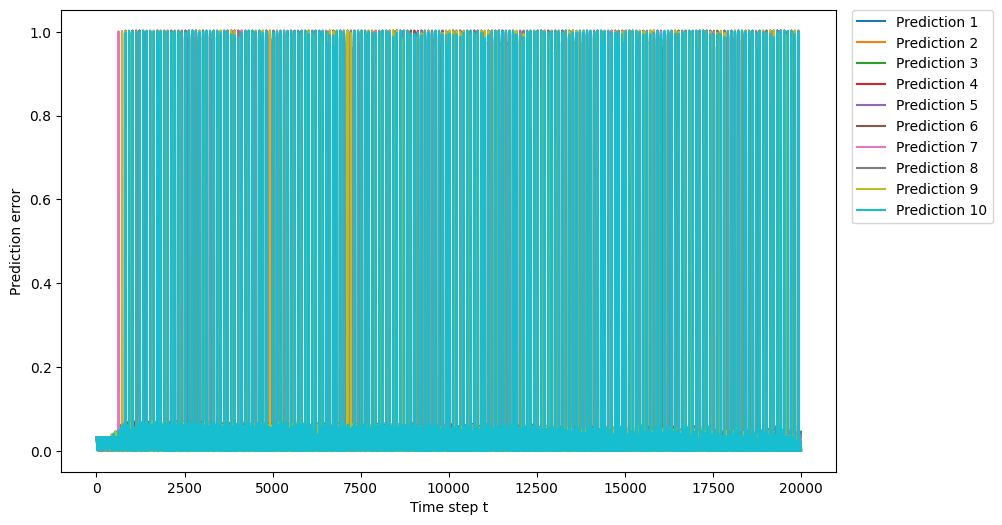

In [45]:
plot_prediction_absolute_error(case4_error_abs_value)

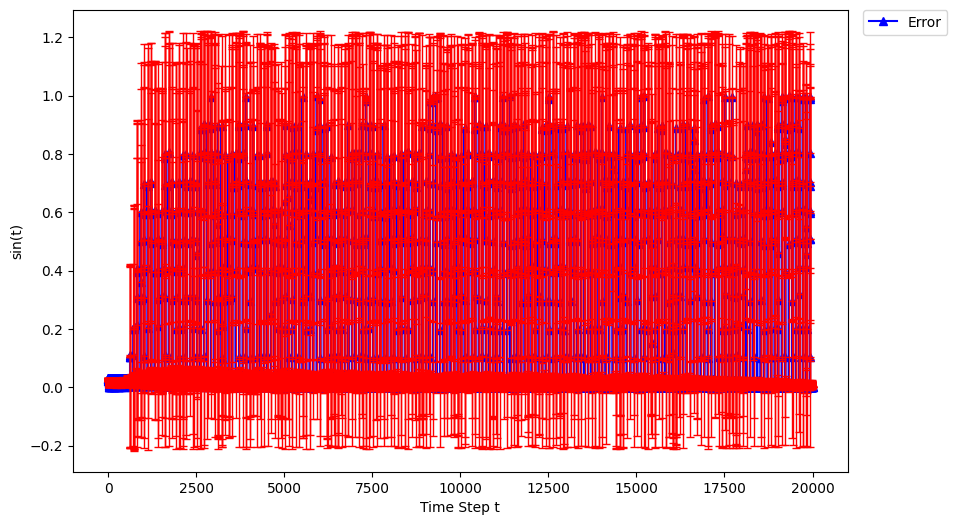

In [46]:
plot_prediction_absolute_error_by_mean_std(case4_error_abs_value, sampling_interval=config.sampling_interval)

## proposed(case5) range 201

In [47]:
case5_df = load_csv_data(config.case5_predict_results_path)
case5_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531445,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562767,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593841,NaN,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,NaN
4,5,0.624545,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [48]:
# true values need to be shifted by 1
true_values = case5_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531445
2        0.562767
3        0.593841
4        0.624545
5        0.654758
           ...   
19997    1.406160
19998    1.437230
19999    1.468550
20000    1.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [49]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case5_predicted_values = case5_df[predicted_column][config.start:config.end+1]
case5_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.5000,0.50000,0.5000,0.5000,0.50000,0.50000,0.5000,0.5000,0.5000,0.50000
1,0.5325,0.53250,0.5325,0.5325,0.53250,0.53250,0.5325,0.5325,0.5325,0.53250
2,0.5625,0.56250,0.5625,0.5625,0.56250,0.56250,0.5625,0.5625,0.5625,0.56250
3,0.5950,0.59500,0.5950,0.5950,0.59500,0.59500,0.5950,0.5950,0.5950,0.59500
4,0.6250,0.62500,0.6250,0.6250,0.62500,0.62500,0.6250,0.6250,0.6250,0.62500
...,...,...,...,...,...,...,...,...,...,...
19996,1.4050,1.40750,1.4075,1.4050,1.40750,1.40625,1.4075,1.4075,1.4050,1.40125
19997,1.4375,1.43500,1.4350,1.4325,1.43500,1.43375,1.4375,1.4375,1.4350,1.43500
19998,1.4675,1.46875,1.4675,1.4675,1.46750,1.46750,1.4725,1.4700,1.4650,1.47000
19999,1.5000,1.50000,1.4925,1.4975,1.49875,1.49750,1.5050,1.5000,1.4950,1.50250


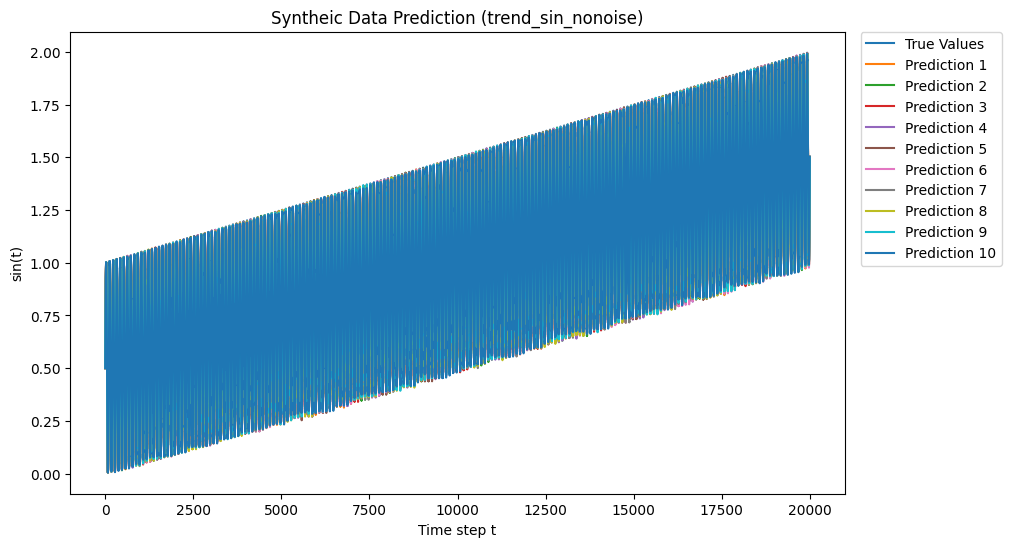

In [50]:
plot_syntheic_load(true_values, case5_predicted_values, config.test_data_path)

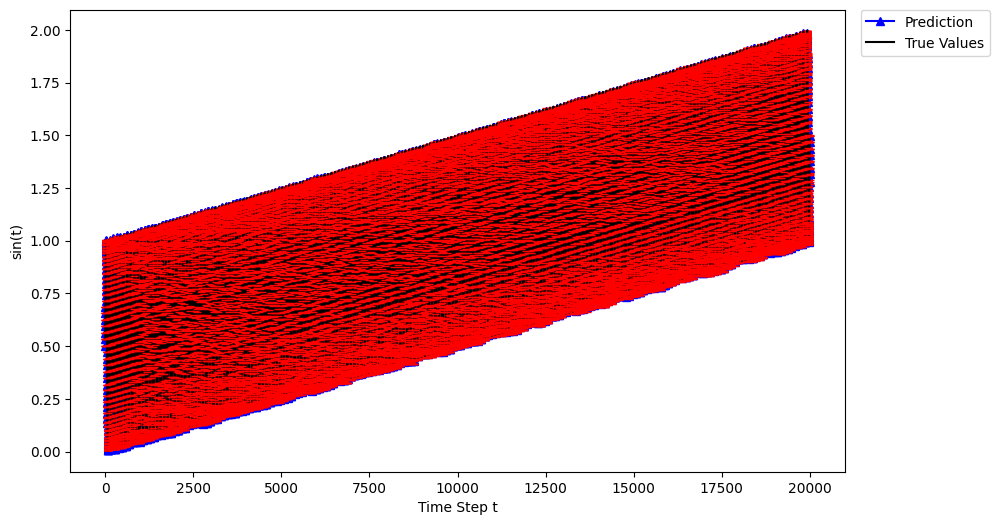

In [51]:
plot_syntheic_load_by_mean_std(true_values, case5_predicted_values, sampling_interval=config.sampling_interval)

In [52]:
# abs(outputdata[n][a] - inputdata[a+1])
case5_error_abs_value = case5_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case5_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,3.144500e-02,3.144500e-02,0.031445,0.031445,0.031445,0.031445,0.031445,3.144500e-02,0.031445,0.031445
20002,3.026700e-02,3.026700e-02,0.030267,0.030267,0.030267,0.030267,0.030267,3.026700e-02,0.030267,0.030267
20003,3.134100e-02,3.134100e-02,0.031341,0.031341,0.031341,0.031341,0.031341,3.134100e-02,0.031341,0.031341
20004,2.954500e-02,2.954500e-02,0.029545,0.029545,0.029545,0.029545,0.029545,2.954500e-02,0.029545,0.029545
...,...,...,...,...,...,...,...,...,...,...
39996,4.600000e-04,4.600000e-04,0.002040,0.000460,0.004540,0.002040,0.002040,2.040000e-03,0.000460,0.004540
39997,1.160000e-03,1.340000e-03,0.001340,0.001160,0.001340,0.000090,0.001340,1.340000e-03,0.001160,0.004910
39998,2.700000e-04,2.230000e-03,0.002230,0.004730,0.002230,0.003480,0.000270,2.700000e-04,0.002230,0.002230
39999,1.050000e-03,2.000000e-04,0.001050,0.001050,0.001050,0.001050,0.003950,1.450000e-03,0.003550,0.001450


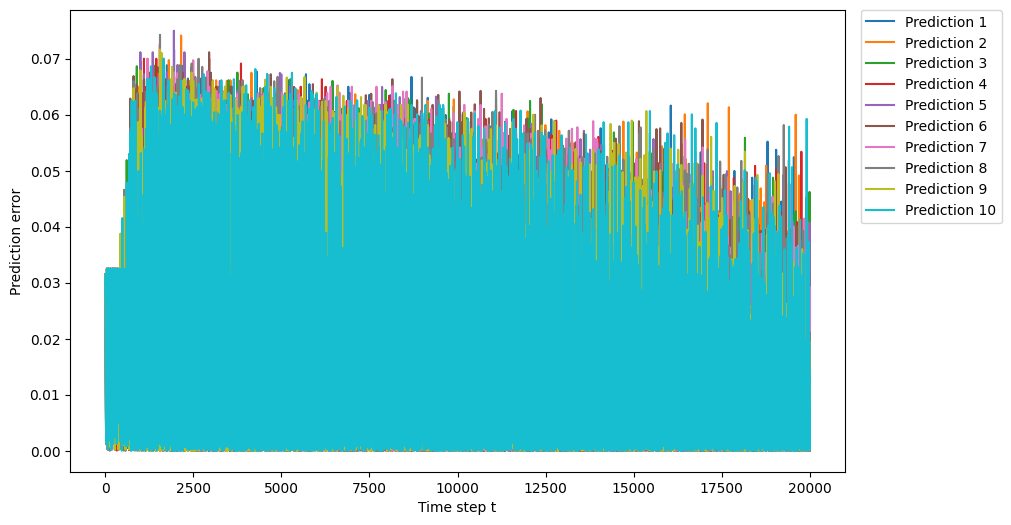

In [53]:
plot_prediction_absolute_error(case5_error_abs_value)

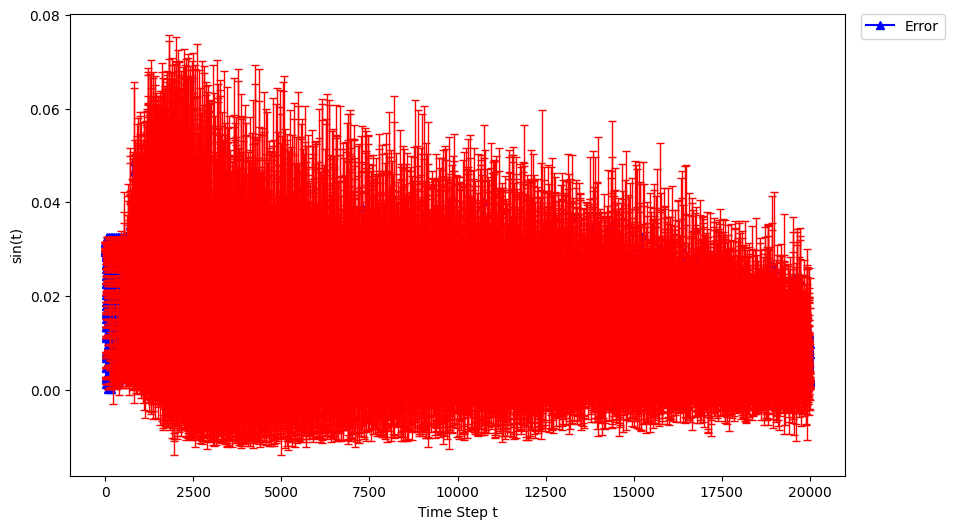

In [54]:
plot_prediction_absolute_error_by_mean_std(case5_error_abs_value, sampling_interval=config.sampling_interval)

# Summary

In [55]:
predicted_values_list = []
error_abs_value_list = []

# The following are the case labels you want to pass
labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5']
# labels = ['Case 2', 'Case 3', 'Case 4']
# labels = ['Case 3', 'Case 4']
# labels = ['Case 1', 'Case 5']
# labels = ['Case 1']

# The following are the case labels you want to pass
predicted_values_list.append(case1_predicted_values)    # Add prediction values for Case 1
predicted_values_list.append(case2_predicted_values)    # Add prediction values for Case 2
predicted_values_list.append(case3_predicted_values)    # Add prediction values for Case 3
predicted_values_list.append(case4_predicted_values)    # Add prediction values for Case 4
predicted_values_list.append(case5_predicted_values)    # Add prediction values for Case 5


error_abs_value_list.append(case1_error_abs_value)      # Add error values for Case 1
error_abs_value_list.append(case2_error_abs_value)      # Add error values for Case 2
error_abs_value_list.append(case3_error_abs_value)      # Add error values for Case 3
error_abs_value_list.append(case4_error_abs_value)      # Add error values for Case 4
error_abs_value_list.append(case5_error_abs_value)      # Add error values for Case 5

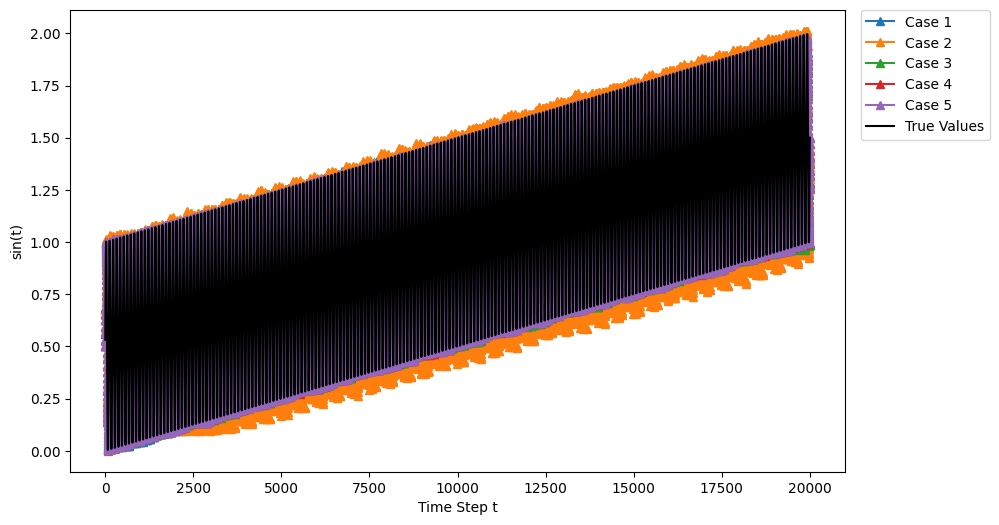

In [56]:
# plot_syntheic_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)
plot_syntheic_load_list_by_mean_std_with_labels(true_values, predicted_values_list, labels=labels, sampling_interval=config.sampling_interval)


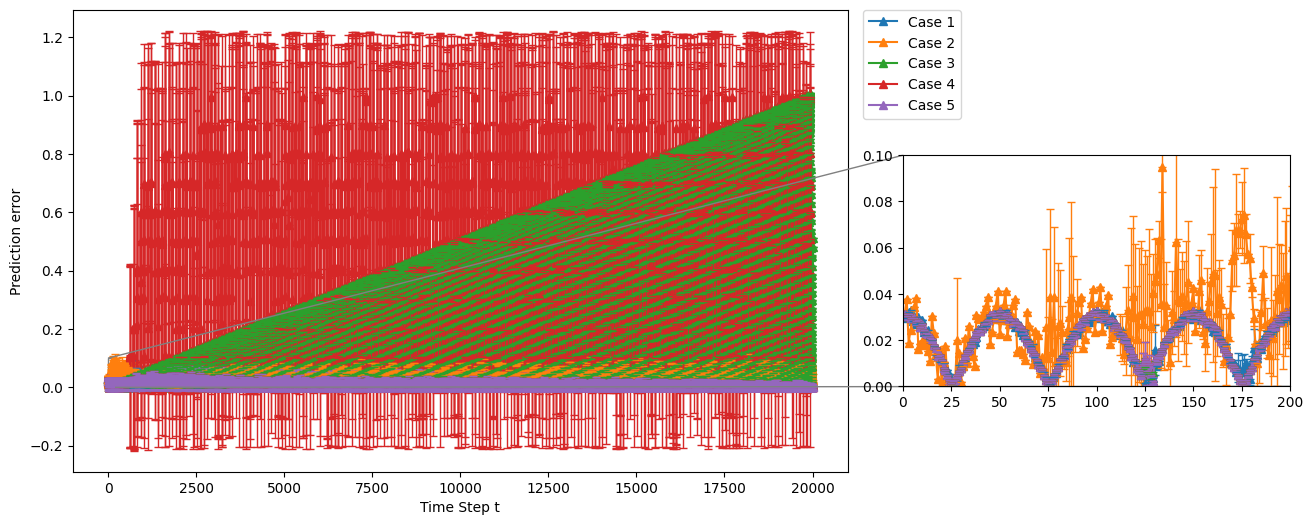

In [57]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)
plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list, labels=labels ,sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)